# Introduction

AutoUplift is a Python package for automatically evaluating various uplift algorithms to estimate endividual treatment effects.

In this notebook, we use synthetic data to demonstrate the use of PipelineRW which can evaluate mutliple algorithms simultaneously, providing metrics such as unscaled qini coefficients and the qini curve.

#### Imports

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from autouplift.pipelines.pipeline_sd import PipelineSD

## 1. Create Data

Basically, the synthetic datasets depend on five parameters:

* Number of samples / rows
* Number of covariates / columns
* Covariance sigma of a symmetric, positive-semidefinite covariance matrix
* Treatment propensity (i.e., treatment-to-control ratio)
* Response rate (here, referred to as threshold)

For example:

In [3]:
n_samples = 20000  # 20.000 samples / rows
n_covariates = 20  # 20 covariates / columns
sigma = 0.5  # Covariance of 0.5
treatment_propensity = 0.5  # treatment propensity of 0.5 (i.e. 50:50)
response_rate = 20  # 20% response rate

## 2. Run Pipeline

The PipelineSD can be used to automatically evaluate a synthetic datasets given some pre-defined configurations, these include:

1. Select the algorithms you want to evaluate
2. Select hyperparameters for each algorithm
3. Select which metrics should be used for the evaluation
4. Selecting the training procedure, for example, k-fold cross-validation vs. single train-test split
5. Define how to log results
6. Define some system-wide parameters such as number of jobs running in parallel or how many threads to use

### 2.1 Basic Usage

Next, we will evaluate the following algorithms using 5-fold CV (<i>cv_number_splits=5</i>)
* Uplift Random Forest with Euclidean Distance (<i>urf_ed</i>)
* Generalized Random Forest (<i>generalized_random_forest</i>)
* Traditional Response Modeling (as a baseline - no uplift modeling method) (<i>traditional</i>)
* Two Model Approach (<i>two_model</i>)

Further, we will plot the qini curve (<i>plot_figures=True</i>) including a legend which provides the value of the unscaled qini coefficient (<i>plot_uqc</i>).

#### Initiate the Pipeline

In [4]:
n_samples = 20000  # 20.000 samples / rows
n_covariates = 20  # 20 covariates / columns
sigma = 0.5  # Covariance of 0.5
treatment_propensity = 0.5  # treatment propensity of 0.5 (i.e. 50:50)
response_rate = 20  # 1 - 0.2 = 0.8 = 80% response rate

In [5]:
pipeline = PipelineSD(
    n=n_samples,
    p=n_covariates,
    sigma=sigma,
    threshold=response_rate,
    propensity=treatment_propensity,
    cv_number_splits=5,
    generalized_random_forest=True,
    max_depth=5,
    min_samples_leaf=50,
    min_samples_treatment=10,
    n_estimators=20,
    plot_figures=True,
    plot_uqc=True,
    run_name="Synthetic_Example",
    show_title=True,
    traditional=True,
    two_model=True,
    urf_ed=True
)

In [6]:
data = pipeline.create_synthetic_dataset()

In [7]:
data.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,...,Feature17,Feature18,Feature19,response,treatment
0,1.196681,0.322762,1.279598,0.989241,1.451471,...,1.933551,0.928352,0.805259,1,0
1,3.358157,1.069744,0.430167,1.414189,1.211770,...,1.858799,1.495199,0.347172,0,0
2,-0.514791,-0.074409,0.078248,-0.482546,0.742257,...,0.651128,0.174596,-0.878457,1,1
3,-1.292412,-0.057426,1.264905,-0.051839,-0.103053,...,0.564113,0.445372,0.120644,1,0
4,-0.834936,-0.638131,0.972100,-0.132451,-0.428369,...,-0.530969,-1.089858,-0.142735,1,1


In [8]:
print(f"Number of samples/rows: {data.shape[0]}")
print(f"Number of covariates: {data.shape[1] - 2}")
print(f"Number of columns: {data.shape[1]}. We have two more columns for response and treatment")
print(f"Treatment propensity: {round(data.treatment.value_counts()[1] / (data.treatment.value_counts()[0] + data.treatment.value_counts()[1]), 2)}")
print(f"Response rate: {round(data.response.value_counts()[1] / (data.response.value_counts()[0] + data.response.value_counts()[1]), 2)}")

Number of samples/rows: 20000
Number of covariates: 20
Number of columns: 22. We have two more columns for response and treatment
Treatment propensity: 0.5
Response rate: 0.8


#### Analyze the Given Dataset and Plot the Results

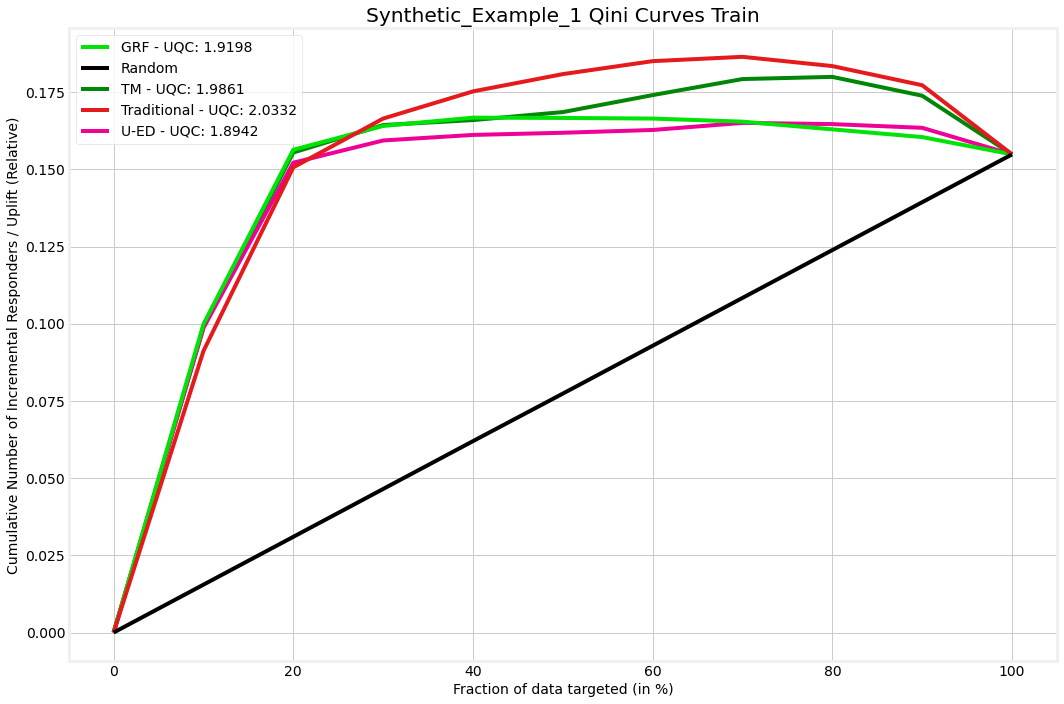

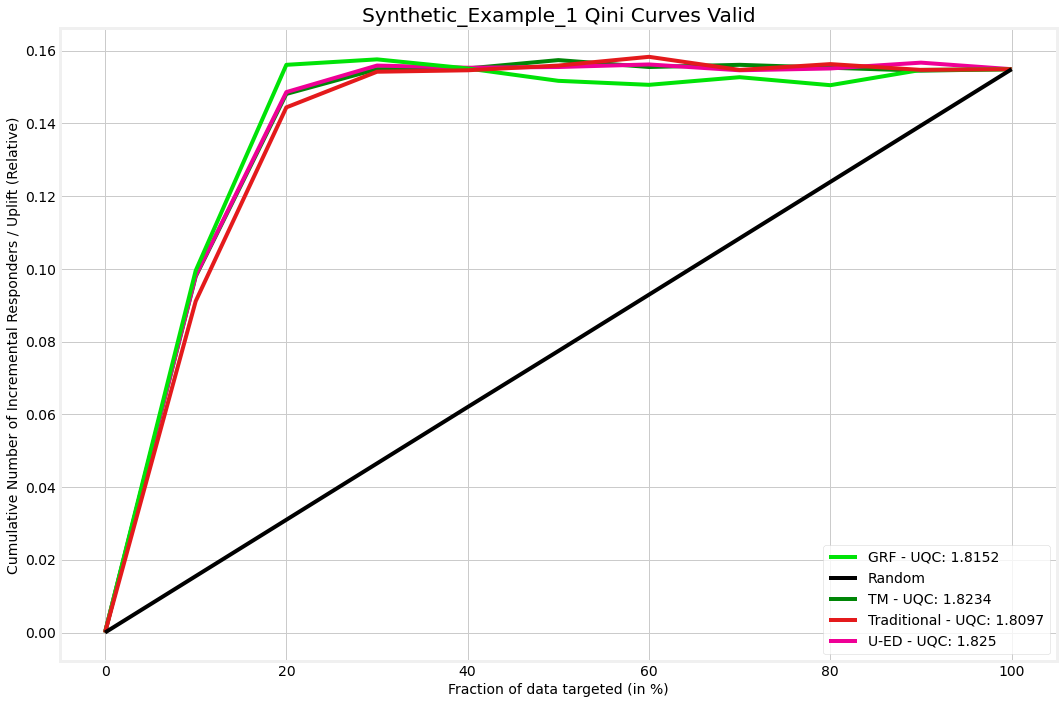

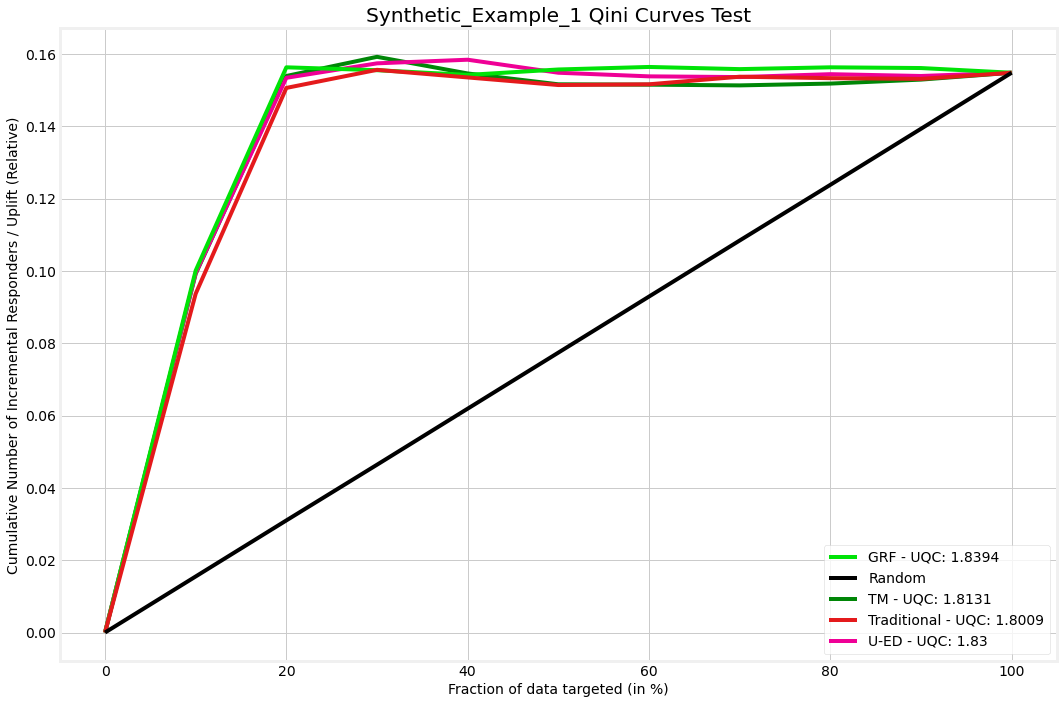

In [9]:
pipeline.analyze_dataset(data)

Enjoy AutoUplift!